# Example to read data in HDF5 format and create a star-formation efficiency plot

In [13]:
# Imports
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [14]:
# Parameters
outputDir='../../../output/Hen15/'
#outputDir='../../../output/new/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=0
lastFile=0

In [15]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
StellarMass=np.empty(nGal)
Mvir=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        StellarMass[iGal:iGal+nGalFile]=f[snap]['StellarMass']
        Mvir[iGal:iGal+nGalFile]=f[snap]['Mvir']
        iGal+=nGalFile

nGal= 9735


(0.0001, 0.1)

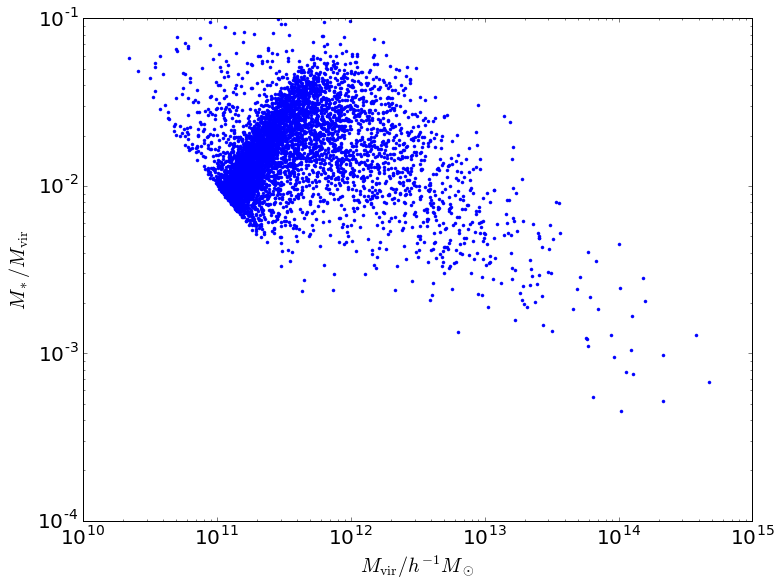

In [17]:
# Plot star-formation efficiency for central galaxy in halos (Type==0)
index0=np.where(Type==0)[0]
# Virial mass of halo in Msun/h
x=1e10*Mvir[index0]
# SFE
y=StellarMass[index0]/Mvir[index0]
plt.figure(0,figsize=(12,9))
plt.loglog(x,y,'.')
plt.xlabel(r'$M_\mathrm{vir}/h^{-1}M_\odot$')
plt.ylabel(r'$M_*/M_\mathrm{vir}$')
plt.ylim([1e-4,1e-1])